# Average True Range

The average true range is a historical volatility indicator taking the moving average of the true range of an asset. The true range is defined as the difference between the high and the low price of a an asset during a given period. This indicator is important because it gives the analyst a better idea of how the volatility of an asset has changed throughout time. 

The average true range can be calculated easily using Python. This notebook will take to the process to calculate the true range of any stock and to quickly analyze the historical trend of the true range.

Let's first import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from pandas_datareader import data as wb

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


The analysis presented in this notebook is for the S&P500 over a period of 38 years, from 1983 to 2021. This period of time will give us an idea of how the volatility has changed in the market in the last four decades.

In [2]:
stock = '^GSPC'
start = '1983-01-01'

We will need to scrap the price data from Yahoo Finance. The module <code>pandas_datareader</code> can retreive this information easily. We can save this data in a DataFrame called <code>data</code>. As noticed below, The DataFrame contains information about High, Low, Open, Close, Volume and Adjusted Close price on the S&P500.

In [3]:
data = pd.DataFrame()
data = wb.DataReader(stock, data_source='yahoo', start = start)

data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1983-01-03,141.330002,138.199997,140.649994,138.339996,59080000,138.339996
1983-01-04,141.360001,138.080002,138.330002,141.360001,75530000,141.360001
1983-01-05,142.600006,141.149994,141.350006,141.960007,95390000,141.960007
1983-01-06,145.770004,142.009995,142.009995,145.270004,129410000,145.270004
1983-01-07,146.460007,145.149994,145.270004,145.179993,127290000,145.179993
...,...,...,...,...,...,...
2021-01-22,3852.310059,3830.409912,3844.239990,3841.469971,5080430000,3841.469971
2021-01-25,3859.229980,3797.159912,3851.679932,3855.360107,6955860000,3855.360107
2021-01-26,3870.899902,3847.780029,3862.959961,3849.620117,6029090000,3849.620117


Let's add one column that will equal the difference between the High and Low price. This column is the True Range of the S&P500 on a daily basis. The True Range is the extreme change that happened during one trading day. The limitation of the True Range is that it is expressed in absolute values which makes comparison difficult. One way to overcome this limitation is by calculating the True Range as a percentage.

In [4]:
data['True Range'] = data['High'] - data['Low']
data

,High,Low,Open,Close,Volume,Adj Close,True Range
Date,,,,,,,
1983-01-03,141.330002,138.199997,140.649994,138.339996,59080000,138.339996,3.130005
1983-01-04,141.360001,138.080002,138.330002,141.360001,75530000,141.360001,3.279999
1983-01-05,142.600006,141.149994,141.350006,141.960007,95390000,141.960007,1.450012
1983-01-06,145.770004,142.009995,142.009995,145.270004,129410000,145.270004,3.760010
1983-01-07,146.460007,145.149994,145.270004,145.179993,127290000,145.179993,1.310013
...,...,...,...,...,...,...,...
2021-01-22,3852.310059,3830.409912,3844.239990,3841.469971,5080430000,3841.469971,21.900146
2021-01-25,3859.229980,3797.159912,3851.679932,3855.360107,6955860000,3855.360107,62.070068
2021-01-26,3870.899902,3847.780029,3862.959961,3849.620117,6029090000,3849.620117,23.119873


As mentioned before, a better way to look the True Range is in percentage basis. To achive this, we can take the True Range column and calculate the two days moving average of the True Range and then divide it over the Open price. This is the Average True Range over one day. Just noticed that with this transformation, we are losing one data point. If we increase the number of days the moving average is calculated, we will lose more data points.

In [5]:
data['ATR 1D'] = data['True Range'].rolling(2).mean()/data['Open']

data

,High,Low,Open,Close,Volume,Adj Close,True Range,ATR 1D
Date,,,,,,,,
1983-01-03,141.330002,138.199997,140.649994,138.339996,59080000,138.339996,3.130005,NaN
1983-01-04,141.360001,138.080002,138.330002,141.360001,75530000,141.360001,3.279999,0.023169
1983-01-05,142.600006,141.149994,141.350006,141.960007,95390000,141.960007,1.450012,0.016732
1983-01-06,145.770004,142.009995,142.009995,145.270004,129410000,145.270004,3.760010,0.018344
1983-01-07,146.460007,145.149994,145.270004,145.179993,127290000,145.179993,1.310013,0.017450
...,...,...,...,...,...,...,...,...
2021-01-22,3852.310059,3830.409912,3844.239990,3841.469971,5080430000,3841.469971,21.900146,0.004981
2021-01-25,3859.229980,3797.159912,3851.679932,3855.360107,6955860000,3855.360107,62.070068,0.010900
2021-01-26,3870.899902,3847.780029,3862.959961,3849.620117,6029090000,3849.620117,23.119873,0.011027


Let's have an idea of the historical Average True Range in the market of the last 40 years. 

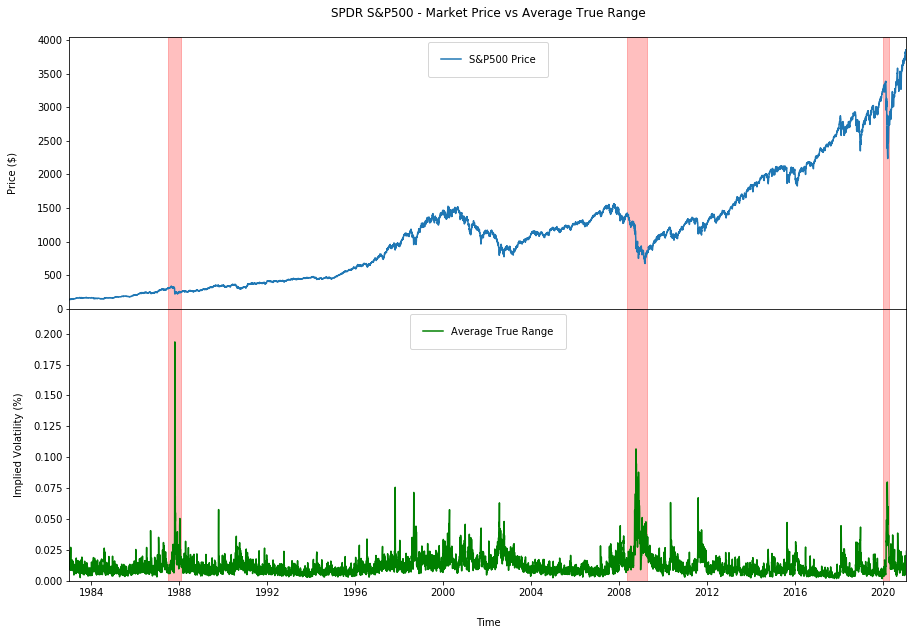

In [105]:
fig,axs = plt.subplots(2,1,figsize=(15,10))

fig.subplots_adjust(hspace=0)

axs[0].plot(data['Adj Close'],label='S&P500 Price')
axs[0].set_xlim(xmin=data['Adj Close'].index[0],xmax=data['Adj Close'].index[-1])
axs[0].set_ylim(ymin=0)
axs[0].legend(labelspacing=2,borderpad=1.25,fontsize=10,loc=9)
axs[0].set_ylabel('Price ($)',labelpad=20)

axs[1].plot(data['ATR 1D'],label='Average True Range',c='g')
axs[1].set_xlim(xmin=data['ATR 1D'].index[0],xmax=data['ATR 1D'].index[-1])
axs[1].set_ylim(ymin=0, ymax=0.22)
axs[1].legend(labelspacing=2,borderpad=1.25,fontsize=10)
axs[1].set_xlabel('Time', labelpad=20)
axs[1].set_ylabel('Implied Volatility (%)', labelpad=10)

axs[0].axvspan(data['ATR 1D'].index[1130], data['ATR 1D'].index[1280], color='red', alpha=0.25)
axs[1].axvspan(data['ATR 1D'].index[1130], data['ATR 1D'].index[1280], color='red', alpha=0.25)

axs[0].axvspan(data['ATR 1D'].index[6400], data['ATR 1D'].index[6630], color='red', alpha=0.25)
axs[1].axvspan(data['ATR 1D'].index[6400], data['ATR 1D'].index[6630], color='red', alpha=0.25)

axs[0].axvspan(data['ATR 1D'].index[9330], data['ATR 1D'].index[9400], color='red', alpha=0.25)
axs[1].axvspan(data['ATR 1D'].index[9330], data['ATR 1D'].index[9400], color='red', alpha=0.25)

axs[0].set_title('SPDR S&P500 - Market Price vs Average True Range',pad=20)


plt.show()